<a href="https://colab.research.google.com/github/Hemant4623/Prodigy_DS_05/blob/main/task_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv')

# Display the first few rows of the dataset
df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765.0,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547.0,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903.0,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232686 entries, 3 to 367264
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   CRASH DATE                     232686 non-null  datetime64[ns]
 1   CRASH TIME                     232686 non-null  object        
 2   BOROUGH                        232686 non-null  object        
 3   ZIP CODE                       232647 non-null  float64       
 4   LATITUDE                       232686 non-null  float64       
 5   LONGITUDE                      232686 non-null  float64       
 6   LOCATION                       232686 non-null  object        
 7   ON STREET NAME                 142197 non-null  object        
 8   CROSS STREET NAME              142113 non-null  object        
 9   OFF STREET NAME                90489 non-null   object        
 10  NUMBER OF PERSONS INJURED      232686 non-null  float64       
 11  NUMBE

In [36]:
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                               0
ZIP CODE                             39
LATITUDE                              0
LONGITUDE                             0
LOCATION                              0
ON STREET NAME                    90489
CROSS STREET NAME                 90573
OFF STREET NAME                  142197
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      1282
CONTRIBUTING FACTOR VEHICLE 2     52769
CONTRIBUTING FACTOR VEHICLE 3    213435
CONTRIBUTING FACTOR VEHICLE 4    227349
CONTRIBUTING FACTOR VEHICLE 5    231020
COLLISION_ID                          0
VEHICLE TYPE CODE 1                2854


In [37]:
df.isna().sum().sum()

2033688

In [20]:
# Convert date columns to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.time

# Drop rows with missing values in key columns
df = df.dropna(subset=['CRASH DATE', 'BOROUGH', 'LATITUDE', 'LONGITUDE'])

# Display the cleaned data
df.head()


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
3,2021-09-11,09:35:00,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314.0,Sedan,NaN,NaN,NaN,NaN
4,2021-12-14,08:13:00,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609.0,NaN,NaN,NaN,NaN,NaN
7,2021-12-14,08:17:00,BRONX,10475.0,40.868160,-73.831480,"(40.86816, -73.83148)",NaN,NaN,344 BAYCHESTER AVENUE,...,Unspecified,NaN,NaN,NaN,4486660.0,Sedan,Sedan,NaN,NaN,NaN
8,2021-12-14,21:10:00,BROOKLYN,11207.0,40.671720,-73.897100,"(40.67172, -73.8971)",NaN,NaN,2047 PITKIN AVENUE,...,Unspecified,NaN,NaN,NaN,4487074.0,Sedan,NaN,NaN,NaN,NaN
9,2021-12-14,14:58:00,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",3 AVENUE,EAST 43 STREET,NaN,...,Unspecified,NaN,NaN,NaN,4486519.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN


In [21]:
# Summary statistics
df.describe()


,CRASH DATE,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,232686,232647.000000,232686.000000,232686.000000,232686.000000,232686.000000,232686.000000,232686.000000,232686.000000,232686.000000,232686.000000,232686.000000,2.326860e+05
mean,2021-01-03 05:08:23.782780160,10899.643705,40.384070,-73.295859,0.387127,0.001728,0.074826,0.000829,0.047437,0.000181,0.253152,0.000653,4.377795e+06
min,2012-07-27 00:00:00,10000.000000,0.000000,-74.254845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.456194e+06
25%,2020-02-07 00:00:00,10457.000000,40.664528,-73.962300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.285938e+06
50%,2020-12-18 00:00:00,11209.000000,40.713242,-73.916500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.378046e+06
75%,2021-10-20 00:00:00,11249.000000,40.774370,-73.865270,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.469843e+06
max,2023-07-23 00:00:00,11697.000000,40.912884,0.000000,18.000000,3.000000,7.000000,2.000000,3.000000,1.000000,18.000000,3.000000,4.648720e+06
std,NaN,522.827635,3.705727,6.724649,0.715020,0.043451,0.277221,0.029233,0.215982,0.013434,0.667683,0.027960,1.064850e+05


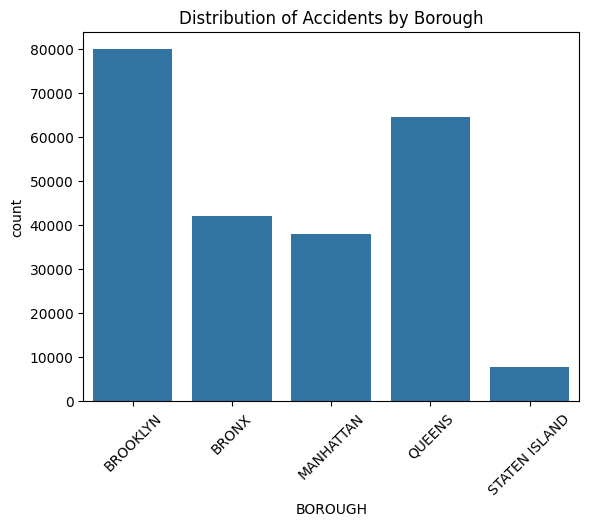

In [22]:
# Distribution of accidents by borough
sns.countplot(x='BOROUGH', data=df)
plt.title('Distribution of Accidents by Borough')
plt.xticks(rotation=45)
plt.show()



<ipython-input-33-8a2dd11b1fa4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CRASH HOUR'].dropna(), bins=24, kde=False, hist=True)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


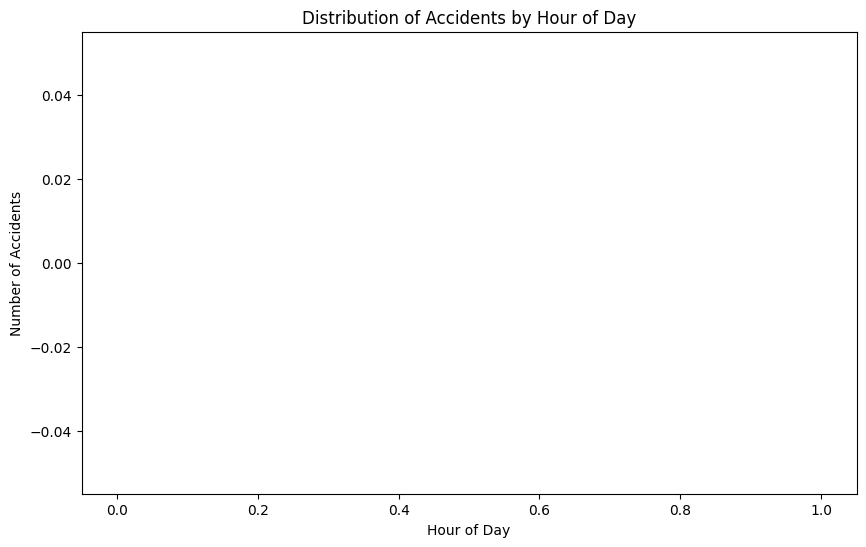

In [33]:
# Extract hour from CRASH TIME and handle missing values
df['CRASH HOUR'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M', errors='coerce').dt.hour

# Distribution of accidents by hour of day using distplot
plt.figure(figsize=(10, 6))
sns.distplot(df['CRASH HOUR'].dropna(), bins=24, kde=False, hist=True)
plt.title('Distribution of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()


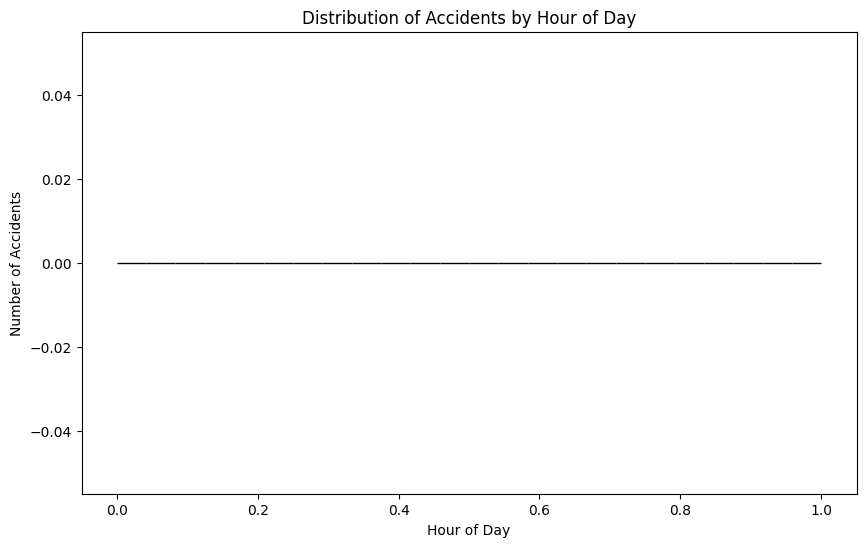

In [34]:
# Alternatively, you can use plt.hist
plt.figure(figsize=(10, 6))
plt.hist(df['CRASH HOUR'].dropna(), bins=24, edgecolor='k')
plt.title('Distribution of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

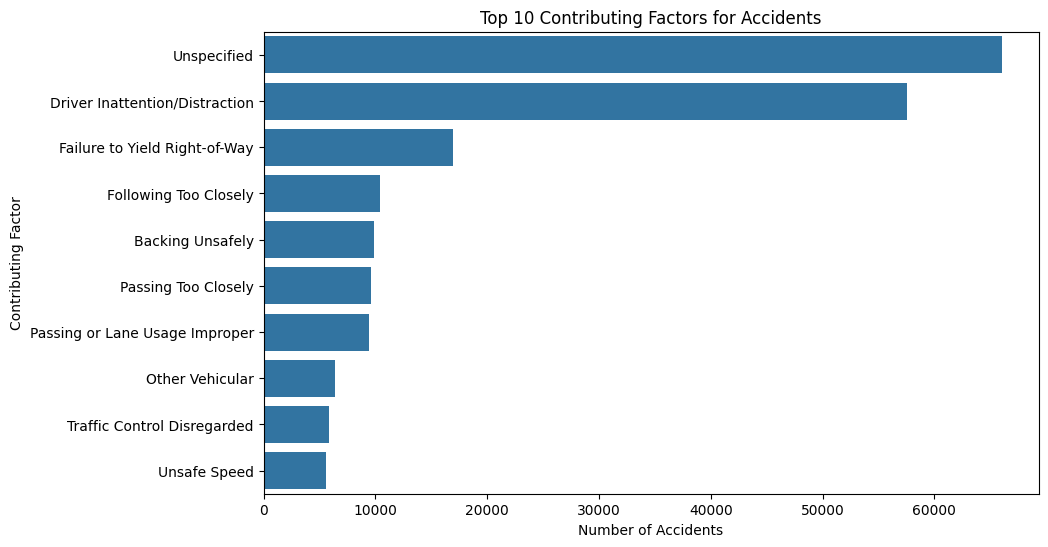

In [32]:
# Top 10 Contributing Factors for Accidents
contributing_factors = df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=contributing_factors.values, y=contributing_factors.index)
plt.title('Top 10 Contributing Factors for Accidents')
plt.xlabel('Number of Accidents')
plt.ylabel('Contributing Factor')
plt.show()